## Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 
The problem here is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Suggest the countries which the CEO needs to focus on the most.

### Solution

#### 1. Read the data and understand it

In [3]:
#Import the necessary pacakges
import numpy as np
import pandas as pd

# Packages to visualize
import matplotlib.pyplot as plt
import seaborn as sns

# K means packages
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Hierarchical package
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [4]:
# Read the csv file
Country=pd.read_csv('Country-data.csv')

In [5]:
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
# Let's look at the dataset
Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
col=Country.columns

In [8]:
# missing values
round(100*(Country.isnull().sum())/len(Country), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

As we can there are 167 countries and its socio - economic factors. There are a total of 10 columns and there are no null values in it. Now, we can describe the numerical values of the dataset.

In [9]:
Country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
sum(Country['country'].value_counts()==1)

167

The scale of values of each features in the dataset in different. Hence we need to scale the data. As I have checked above each value of country is unique and hence can be considered as the Primary Key.

#### 2. Visualize the data

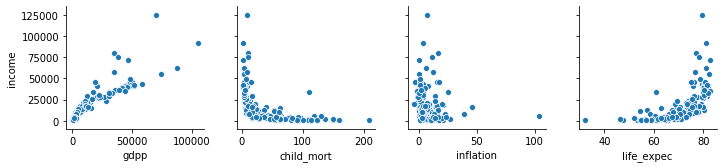

In [17]:
sns.pairplot(Country,x_vars=['gdpp','child_mort','inflation','life_expec'],y_vars='income',kind='scatter')

In the pair plots above, we have compared gdp, child mortality, inflation and life expectancy vs income. Few notable observations are that:
1. gdp has an almost linear relationship with income
2. child mortality is mostly clustered between 0 to 100 range for lower incomes.
3. As the income gets above 50000, child mortality and inflation tends to 0
4. Life expectancy is clustered in the range 60 to 80 because of rise in income. But Increase in income doesn't affect the life expectancy to go much beyond 80.
5. Inflation has few outliers in 0 to 25000 bracket of income

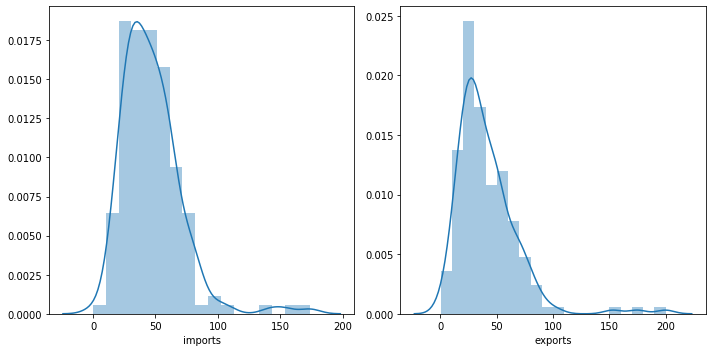

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(Country['imports'])
plt.subplot(1,2,2)
sns.distplot(Country['exports'])
plt.tight_layout()
plt.show()

From the above plot, we can confer that the imports and exports of all the countries has almost similar distribution. That is, the min, max and mean of both are in a similar range.

#### 3. Outlier Analysis
Let us plot the box-plots and analyse the outliers. Outliers affect our final clusters by pulling the cluster centres towards it. So it is important to check for outliers in our dataset.

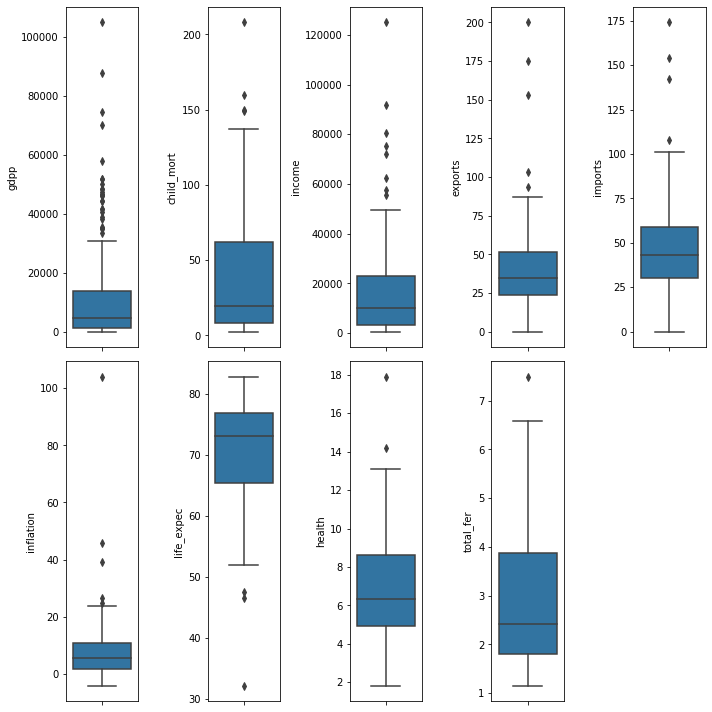

In [35]:
plt.figure(figsize=(10,10))
plt.subplot(2,5,1)
sns.boxplot(y='gdpp',data=Country)
plt.subplot(2,5,2)
sns.boxplot(y='child_mort',data=Country)
plt.subplot(2,5,3)
sns.boxplot(y='income',data=Country)
plt.subplot(2,5,4)
sns.boxplot(y='exports',data=Country)
plt.subplot(2,5,5)
sns.boxplot(y='imports',data=Country)
plt.subplot(2,5,6)
sns.boxplot(y='inflation',data=Country)
plt.subplot(2,5,7)
sns.boxplot(y='life_expec',data=Country)
plt.subplot(2,5,8)
sns.boxplot(y='health',data=Country)
plt.subplot(2,5,9)
sns.boxplot(y='total_fer',data=Country)
plt.tight_layout()
plt.show()

There are outliers in all the numerical features. But since we have very few data, dropping columns can cost us information. Also the solution to our problem is also an outlier set which has dire need for fund.Hence I have chosen not to drop any rows as of now. So for dimensionality reduction lets use PCA and capture much information.

#### 4. Scaling the data

In [11]:
#Instantiate Standard Scaler

scaler=StandardScaler()

#Capture the numeric data
n_col=list(col)
n_col.remove('country')
x=Country[n_col]
x

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [12]:
# fit and transform the data
X = scaler.fit_transform(x)
X[:5,:5]

array([[ 1.29153238, -1.13827979,  0.27908825, -0.08245496, -0.8082454 ],
       [-0.5389489 , -0.47965843, -0.09701618,  0.07083669, -0.3753689 ],
       [-0.27283273, -0.09912164, -0.96607302, -0.64176233, -0.22084447],
       [ 2.00780766,  0.77538117, -1.44807093, -0.16531531, -0.58504345],
       [-0.69563412,  0.1606679 , -0.28689415,  0.4975675 ,  0.10173177]])

In [14]:
# Find the largest value in data after scaling. It can be high value since outliers are there
X.max()

9.129718055281284

#### 5. Apply PCA on the Scaled data

In [15]:
# import PCA package
from sklearn.decomposition import PCA

# instantiate PCA
pca=PCA(random_state=50)

In [16]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [18]:
# Check the variance explained by each of the 9 PCs
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

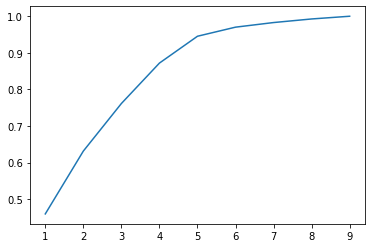

In [19]:
# Calculate the Cumulative variance and draw the Scree Plot
cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1,len(cum_var)+1),cum_var)

The scree plot above show that almost 95% of the variance is explained by 5 Principal Components.
Let's build a 5 component PCA.

In [20]:
# instantiate a PCA with 5 components
from sklearn.decomposition import IncrementalPCA
pca2 = IncrementalPCA(n_components = 5)

In [21]:
X_new = pca2.fit_transform(X)
X_new[:5,:5]

array([[-2.91299992,  0.09196945, -0.72124247,  1.00183771, -0.14676471],
       [ 0.42986988, -0.589373  , -0.32861101, -1.16501385,  0.15320524],
       [-0.28528875, -0.45213872,  1.23205055, -0.85776702,  0.19122716],
       [-2.93271361,  1.69877055,  1.52507602,  0.8555955 , -0.21477797],
       [ 1.03337146,  0.13385274, -0.2166992 , -0.84663766, -0.19318625]])

In [22]:
X_df=pd.DataFrame(X_new,columns=['PC1','PC2','PC3','PC4','PC5'])
X_df

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186
...,...,...,...,...,...
162,-0.820753,0.636404,-0.379488,-0.706886,-0.400381
163,-0.549894,-1.215018,3.074556,-0.108594,2.114025
164,0.498570,1.392777,-0.252849,-1.085037,1.156471
165,-1.887294,-0.105397,1.107639,0.062636,0.665467


In [23]:
# attaching Country name to the PC table
y=Country['country']
label_df= pd.concat([X_df,y],axis=1)
label_df

,PC1,PC2,PC3,PC4,PC5,country
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda
...,...,...,...,...,...,...
162,-0.820753,0.636404,-0.379488,-0.706886,-0.400381,Vanuatu
163,-0.549894,-1.215018,3.074556,-0.108594,2.114025,Venezuela
164,0.498570,1.392777,-0.252849,-1.085037,1.156471,Vietnam
165,-1.887294,-0.105397,1.107639,0.062636,0.665467,Yemen


#### 6. Hopkin's Statistics

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered. 
We are trying the to analyse whether the data at hand is worth clustering or not.

In [24]:
# Hopkins statistic Function is defined as

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [25]:
hopkins(X_df)

0.8304816722890094

Since the Hopkins Statistics gave a value between {0.7, ..., 0.99}, it has a high tendency to cluster.
Let's go ahead and model the data. We will cluster the data using K-means and Hierarchical clustering and chose the technique that gave the best clusters.

#### 7. Modelling

### A. Find the optimal number of Clusters

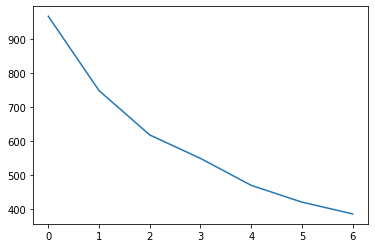

In [26]:
# The Elbow method

score=[]
cluster=[2,3,4,5,6,7,8]

for c in cluster:
    km= KMeans(n_clusters=c,max_iter=150)
    km.fit(X_df)
    score.append(km.inertia_)
    
plt.plot(score)

The Elbow method could not give a sharp, clear elbow so the number of clusters is still not sure. Let's conduct silhouette analysis.A score closer to 1 indicates that the data point is very similar to other data points in the cluster.

In [27]:
# Silhouette analysis
for c in cluster:
    
    kmeans = KMeans(n_clusters=c, max_iter=150)
    kmeans.fit(X_df)
    
    c_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_df, c_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(c, silhouette_avg))

For n_clusters=2, the silhouette score is 0.304339954285527
For n_clusters=3, the silhouette score is 0.3079553690964611
For n_clusters=4, the silhouette score is 0.32638946117592943
For n_clusters=5, the silhouette score is 0.2519641694787017
For n_clusters=6, the silhouette score is 0.2579276973080551
For n_clusters=7, the silhouette score is 0.2766148073217792
For n_clusters=8, the silhouette score is 0.27256038122753223


The silhouette Score for 4 cluster k-means and 5 cluster k-means is the highest among these. Even the score of .32 is very low. So lets consider K-means with 4 clusters.

#### B. K-means model with 4 clusters

In [28]:
km=KMeans(n_clusters=4,max_iter=150)
km.fit(X_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
# Labels can be viewed as
km.labels_

array([2, 1, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2,
       1, 3, 1, 2, 2, 1, 2, 3, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 3, 1,
       3, 1, 1, 1, 1, 2, 2, 1, 1, 3, 3, 2, 2, 1, 3, 2, 3, 1, 1, 2, 2, 1,
       2, 1, 3, 1, 1, 1, 2, 3, 3, 3, 1, 3, 1, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       3, 3, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 3, 1, 2, 3, 3, 1, 1, 2, 1, 3, 3, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 3, 3, 3, 1, 1, 1, 1, 1, 2, 2])

In [45]:
# Lets add the Cluster Id to the data
label_df['Cluster_id']=km.labels_
label_df

,PC1,PC2,PC3,PC4,PC5,country,Cluster_id,H_cluster
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan,2,0
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania,1,0
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria,1,0
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola,2,0
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda,1,0
...,...,...,...,...,...,...,...,...
162,-0.820753,0.636404,-0.379488,-0.706886,-0.400381,Vanuatu,1,0
163,-0.549894,-1.215018,3.074556,-0.108594,2.114025,Venezuela,1,0
164,0.498570,1.392777,-0.252849,-1.085037,1.156471,Vietnam,1,0
165,-1.887294,-0.105397,1.107639,0.062636,0.665467,Yemen,2,0


C:\Users\RebaReggie\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


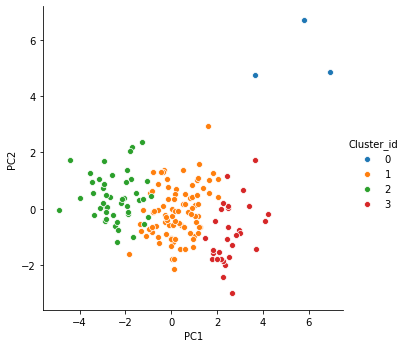

In [31]:
sns.pairplot(data=label_df, x_vars=["PC1"], y_vars=["PC2"], hue = "Cluster_id", size=5)

In [60]:
Country['Cluster_id']=km.labels_
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id,H_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0


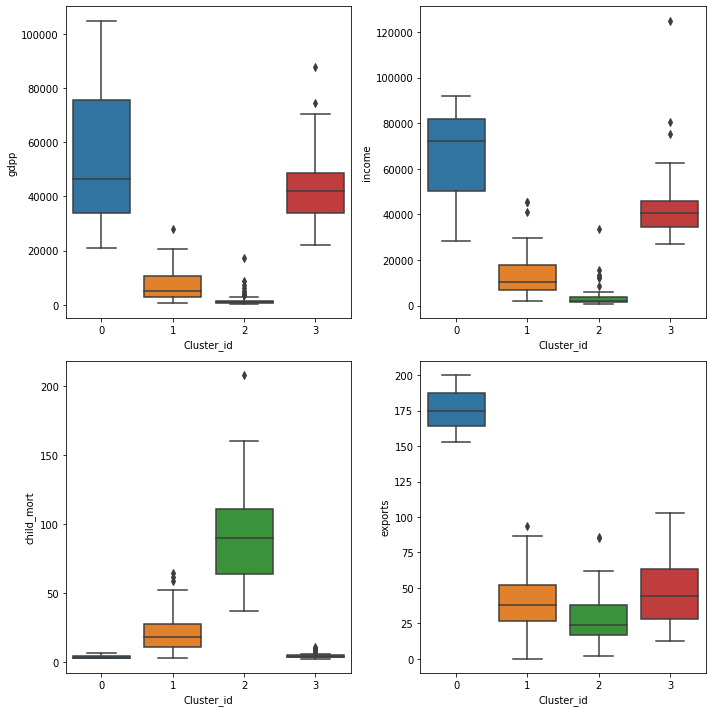

In [61]:
# Let us take few features and differentiate the cluster wise to find out the cluster characteristics
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x='Cluster_id', y='gdpp', data=Country)
plt.subplot(2,2,2)
sns.boxplot(x='Cluster_id', y='income', data=Country)
plt.subplot(2,2,3)
sns.boxplot(x='Cluster_id', y='child_mort', data=Country)
plt.subplot(2,2,4)
sns.boxplot(x='Cluster_id', y='exports', data=Country)
plt.tight_layout()
plt.show()

The clusters formed can be characterised as:
- Cluster 0: High Income and gdp, very low child mortality and very high export rate.
- Cluster 1: low gdp and income with few outliers, low child mortality rate and exports.
- Cluster 2: low gdp,low income, high child mortality and low exports.
- Cluster 3: Average income and gdp, low child mortality and below average export rate.
    

### C. Hierarchical Clustering - Single Linkage

In [33]:
X_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


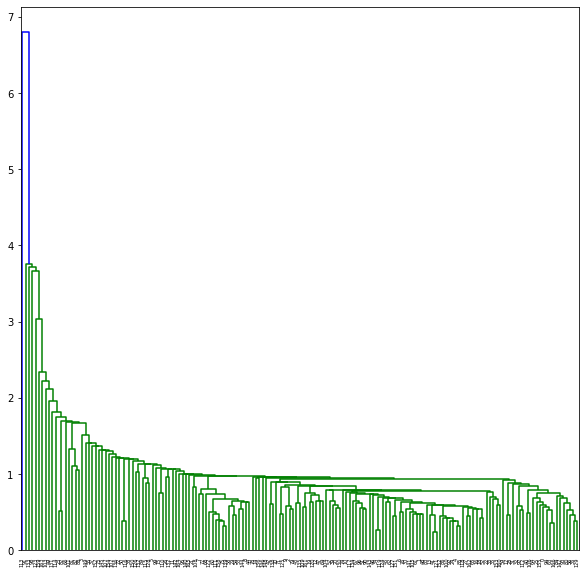

In [34]:
# single linkage
link1 = linkage(X_df, method="single", metric='euclidean')
plt.figure(figsize=(10,10))
dendrogram(link1)
plt.show()

The dendrogram formed above is not clear and can't be used for cluster analysis. At level=4, we can see that there are only 2 clusters. Green cluster considers almost all the countries.

### D. Hieararchical Clustering - Complete Linkage

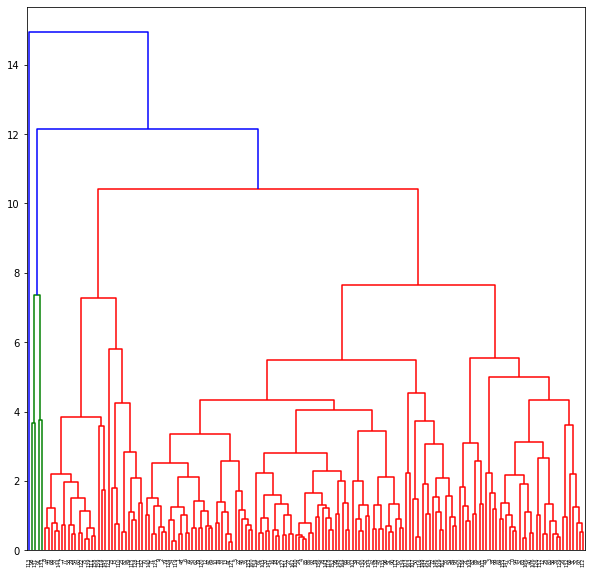

In [35]:
#Complete Linkage
link2 = linkage(X_df, method="complete", metric='euclidean')
plt.figure(figsize=(10,10))
dendrogram(link2)
plt.show()

From the above dendrogram, it is visible that there are mainly 3 clusters formed represented as blue, green and red. Majority of the countries fall under red. Let's create 3  clusters and analyse it.

In [36]:
# Form 3 clusters from the dendrogram formed
h_cluster = cut_tree(link2, n_clusters=3).reshape(-1, )
h_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
# Lets assign the new clusters to dataframe
Country['H_cluster']=h_cluster
label_df['H_cluster']=h_cluster
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id,H_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0


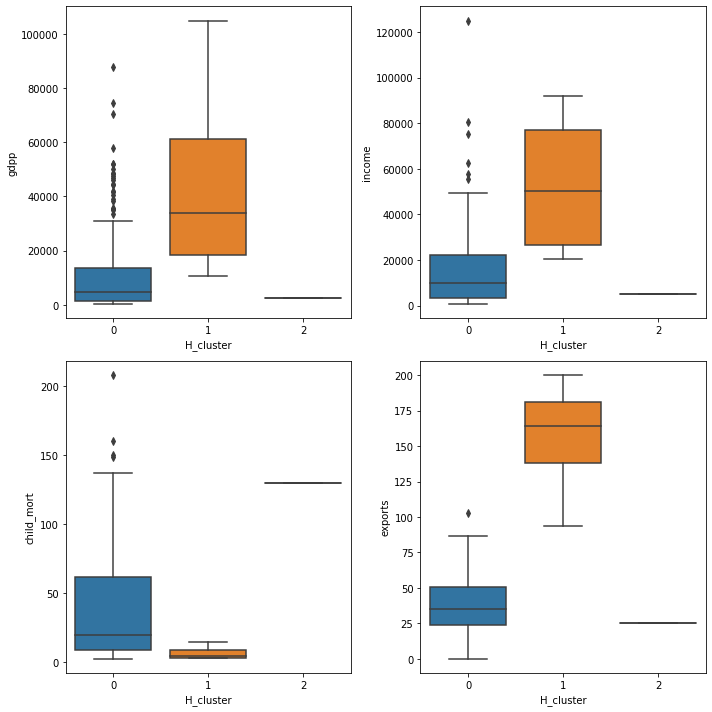

In [38]:
# Let us take few features and differentiate the cluster wise to find out the cluster characteristics
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x='H_cluster', y='gdpp', data=Country)
plt.subplot(2,2,2)
sns.boxplot(x='H_cluster', y='income', data=Country)
plt.subplot(2,2,3)
sns.boxplot(x='H_cluster', y='child_mort', data=Country)
plt.subplot(2,2,4)
sns.boxplot(x='H_cluster', y='exports', data=Country)
plt.tight_layout()
plt.show()

In [39]:
# Lets consider the Countries in each cluster formed by Hierarchical Clustering
Country['H_cluster'].value_counts()

0    162
1      4
2      1
Name: H_cluster, dtype: int64

In [1]:
# Lets consider the Countries in each cluster formed by K - means Clustering
Country['Cluster_id'].value_counts()

NameError: name 'Country' is not defined

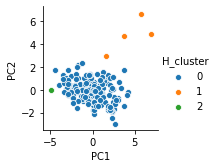

In [54]:
# Lets visualize the clusters formed in both techniques
sns.pairplot(data=label_df, x_vars=["PC1"], y_vars=["PC2"], hue = "H_cluster")


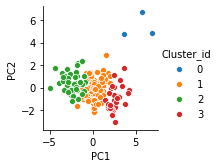

In [49]:

sns.pairplot(data=label_df, x_vars=["PC1"], y_vars=["PC2"], hue = "Cluster_id")


We can see here that clustering outcome of both methods are quite different. 
- Hierarchical Clustering has clustered most of the countries into cluster 0, leave 5 outliers into cluster 1 and 2. If we check the boxplots of clusters formed by Hierarchical clustering, cluster 0 has low gdp and low income, hence contains under developed countries. But this cluster is still un reliable since it has outliers in all segments. 
- K-means on other hand gave 4 clusters with more definite behaviour. We can see that similarly clustered countries are again separated into 3 clusters. The 3 outliers are handled as another cluster as well.
There lets analyse the cluster formed by K means to get to our problem solution.

#### 8. Cluster Analysis

In [63]:
mdf=Country.drop(['country','H_cluster'], axis = 1).groupby('Cluster_id').mean()
mdf

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster_id,,,,,,,,,
0,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
1,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448
2,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
3,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333


From the table, it is clear the cluster2 contains countries with least GDP per capita and lowest income. Let us further consider other features in this cluster, to see if it supports the common feature of this cluster.
- highest child mortality
- lowest exports of goods
- one among the cluster spending lowest on health
- second lowest imports of goods
- Highest inflation of 12%
- lowest life expectancy rate of around 60
- Highest total_fer which implies that atmost 5 children can be born to each woman.

The countries in this cluster can be considered for the fund since
- currently under developed as suggested by gdp and income
- High inflation suggests that there is unemployement
- low life expectations suggest that most of the population is young and can help in boosting economy if more jobs are made
- Export rate is also very low probably since the countries doesn't produce much
- high child mortality shows lack of progress in health sector and provision of vaccines for kids


In [75]:
C2 = Country.loc[Country['Cluster_id']==2]
C2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id,H_cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,2,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2,0


In [78]:
C2=C2.drop('H_cluster',axis=1)

<Figure size 720x720 with 0 Axes>

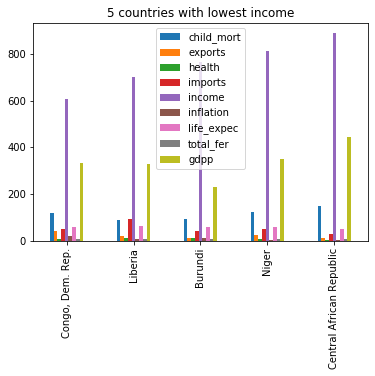

In [115]:
# List out 5 countries with lowest income
List1=C2.sort_values(by=['income'],axis=0)[:5]
List1.drop('Cluster_id',axis=1,inplace=True)
bars = list(List1['country'])
y_pos = np.arange(len(bars))

plt.figure(figsize=(10,10))
List1.plot(kind='bar')
plt.xticks(y_pos,bars)
plt.title('5 countries with lowest income')
plt.show()

<Figure size 720x720 with 0 Axes>

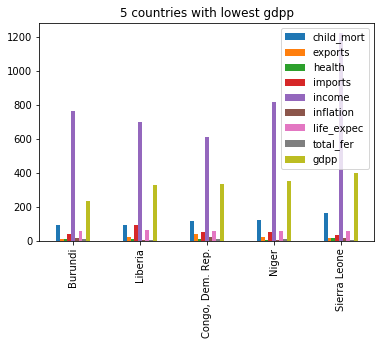

In [116]:
# List out 5 countries with lowest gdpp
List2=C2.sort_values(by=['gdpp'],axis=0)[:5]
List2.drop('Cluster_id',axis=1,inplace=True)
bars = list(List2['country'])
y_pos = np.arange(len(bars))

plt.figure(figsize=(10,10))
List2.plot(kind='bar')
plt.xticks(y_pos,bars)
plt.title('5 countries with lowest gdpp')
plt.show()

<Figure size 720x720 with 0 Axes>

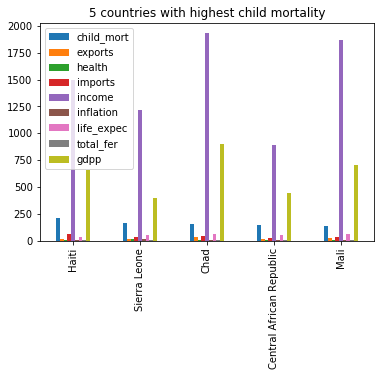

In [117]:
# List out 5 countries with highest child mortality
List3=C2.sort_values(by=['child_mort'],axis=0,ascending=False)[:5]
List3.drop('Cluster_id',axis=1,inplace=True)
bars = list(List3['country'])
y_pos = np.arange(len(bars))

plt.figure(figsize=(10,10))
List3.plot(kind='bar')
plt.xticks(y_pos,bars)
plt.title('5 countries with highest child mortality')
plt.show()

<Figure size 720x720 with 0 Axes>

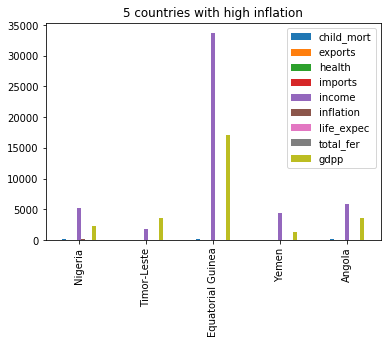

In [118]:
# List out 5 countries with high inflation
List4=C2.sort_values(by=['inflation'],axis=0,ascending=False)[:5]
List4.drop('Cluster_id',axis=1,inplace=True)
bars = list(List4['country'])
y_pos = np.arange(len(bars))

plt.figure(figsize=(10,10))
List4.plot(kind='bar')
plt.xticks(y_pos,bars)
plt.title('5 countries with high inflation')
plt.show()

In [112]:
# Lets find common countries among these 3 lists.
s1=set(List1['country'])
s2=set(List2['country'])
s3=set(List3['country'])
s4=set(List4['country'])
s5=s1.intersection(s2)
s5

{'Burundi', 'Congo, Dem. Rep.', 'Liberia', 'Niger'}

In [113]:
s6=s3.intersection(s4)
s6

set()

In [114]:
s2.intersection(s3)

{'Sierra Leone'}

### These are Final 6 countries which are in direst need.

- There are 4 countries which has both low gdp and low income, which are :
   1. Burundi
   2. Congo, Dem. Rep.
   3. Liberia
   4. Niger
- There no common countries having High child mortality and high inflation.
- There was one country which had low gdp and high inflation, which is:
   1. Sierra Leone
   Also considering between Haiti and Sierra Leone, Sierra had lower income.
- Considered the country with highest inflation as well, which is:
   1. Nigeria
   